# Analiza zbioru danych

## Wczytanie zbioru danych. Analiza ujawniła istnienie nagłówka. Dane przechowywane są w formacie tsv - Tab Separated Values

In [212]:
inputFile <- read.table("TitanicMess.tsv", sep="\t", header=TRUE)

## Wyświetlenie części wczytanych danych

In [193]:
head(inputFile, n=10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,ship
,<int>,<int>,<int>,<chr>,<chr>,<chr>,<int>,<int>,<chr>,<chr>,<chr>,<chr>,<chr>
1,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,"7,25",,S,Titanic
2,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Thayer)",female,38,1,0,PC 17599,"71,2833",C85,C,Titanic
3,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,"7,925",,S,Titanic
4,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,"53,1",C123,S,Titanic
5,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,"8,05",,S,Titanic
6,6,0,3,"Moran, Mr. James",male,,0,0,330877,"8,4583",,Q,Titanic
7,7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,"51,8625",E46,S,Titanic
8,8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,"21,075",,S,Titanic
9,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,"11,1333",,S,Titanic


## Analiza kolumn - jakie typy danych kryją się pod kolejnymi kolumnami

In [195]:
colnames(inputFile)

[1] "PassengerId" "Survived"    "Pclass"      "Name"        "Sex"        
 [6] "Age"         "SibSp"       "Parch"       "Ticket"      "Fare"       
[11] "Cabin"       "Embarked"    "ship"

In [157]:
str(inputFile)

'data.frame':	719 obs. of  13 variables:
 $ PassengerId: int  1 2 3 4 5 7 8 9 10 11 ...
 $ Survived   : int  0 1 1 1 0 0 0 1 1 1 ...
 $ Pclass     : int  3 1 3 1 3 1 3 3 2 3 ...
 $ Name       : chr  "Braund, Mr. Owen Harris" "Cumings, Mrs. John Bradley (Florence Briggs Thayer)" "Heikkinen, Miss. Laina" "Futrelle, Mrs. Jacques Heath (Lily May Peel)" ...
 $ Sex        : chr  "male" "female" "female" "female" ...
 $ Age        : num  22 38 26 35 35 54 2 27 14 4 ...
 $ SibSp      : int  1 1 0 1 0 0 3 0 1 1 ...
 $ Parch      : int  0 0 0 0 0 0 1 2 0 1 ...
 $ Ticket     : chr  "A/5 21171" "PC 17599" "STON/O2. 3101282" "113803" ...
 $ Fare       : chr  "7,25" "71,2833" "7,925" "53,1" ...
 $ Cabin      : chr  "" "C85" "" "C123" ...
 $ Embarked   : chr  "S" "C" "S" "S" ...
 $ ship       : chr  "Titanic" "Titanic" "Titanic" "Titanic" ...


In [196]:
summary(inputFile)

  PassengerId        Survived          Pclass          Name          
 Min.   :   1.0   Min.   :0.0000   Min.   :1.000   Length:892        
 1st Qu.: 223.8   1st Qu.:0.0000   1st Qu.:2.000   Class :character  
 Median : 444.5   Median :0.0000   Median :3.000   Mode  :character  
 Mean   : 445.8   Mean   :0.3868   Mean   :2.307                     
 3rd Qu.: 668.2   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :1000.0   Max.   :1.0000   Max.   :3.000                     
     Sex                Age                SibSp            Parch       
 Length:892         Length:892         Min.   :0.0000   Min.   :0.0000  
 Class :character   Class :character   1st Qu.:0.0000   1st Qu.:0.0000  
 Mode  :character   Mode  :character   Median :0.0000   Median :0.0000  
                                       Mean   :0.5258   Mean   :0.3711  
                                       3rd Qu.:1.0000   3rd Qu.:0.0000  
                                       Max.   :8.0000   Max.   :5.0000  

Wstępna analiza pozwoliła na wyciągnięcie następujących wniosków: 
Kolumna Age wymaga zmiany typu danych na dane numeryczne z uwzględnieniem dwóch różnych separatorów - przecinka i kropki.
Po zmianie typu danych w kolumnie Age na numeryczne, należy sprawdzić zakres wartości - za poprawne wartości przyjmuję wiek pomiędzy 0 a 110 lat.
Wiersze, w których brakuje wartości lub wartości nie mieszczą się w poprawnym zakresie zostaną usunięte.

Kolumna Fare wymaga zmiany typu danych na dane numeryczne z uwzględnieniem dwóch różnych separatorów - przecinka i kropki.
Po zmianie typu danych w kolumnie Fare na numeryczne, należy sprawdzić zakres wartości - za poprawne wartości przyjmuję wszystkie wartości dodatnie i 0. Wiersze, w których brakuje wartości lub wartości nie mieszczą się w poprawnym zakresie zostaną usunięte.

## Sprawdzenie czy w kolumnie ship znajduje się tylko jedna nazwa statku. Jeśli nie -należałoby wyczyścić dane, jeśli tak - można usunąć kolumnę, jest niepotrzebna do analizy

In [184]:
unique(inputFile$ship)

[1] "Titanic"

## Usunięcie niepotrzebnych do analizy kolumn

In [189]:
drops <- c("PassengerId","ship")
inputFile <- inputFile[ , !(names(inputFile) %in% drops)]

## Usunięcie zduplikowanych wierszy

In [182]:
library(dplyr)
inputFile <- distinct(inputFile)

## Ujednolicenie separatora i zmiana typu danych na dane numeryczne oraz usunięcie wierszy, w których brakuje danych dot. wieku pasażera

In [213]:
inputFile$Age <- as.numeric(gsub(",", ".", gsub("\\.", "", inputFile$Age)))

In [214]:
inputFile <- inputFile[!is.na(inputFile$Age), ]

## Usunięcie wierszy, w których wiek przekracza 110 lat

In [215]:
inputFile <- inputFile[!(inputFile$Age >110),]

## Usunięcie wierszy, w których wiek jest mniejszy niż 0 lat

In [216]:
inputFile <- inputFile[!(inputFile$Age <0),]

In [217]:
summary(inputFile$Age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.42   20.00   28.00   29.61   38.00   80.00 

## Ujednolicenie separatora i zmiana typu danych na dane numeryczne oraz usunięcie wierszy, w których brakuje danych dot. opłaty uiszczonej przez pasażera

In [218]:
inputFile$Fare <- as.numeric(gsub(",", ".", gsub("\\.", "", inputFile$Fare)))

Warning message in eval(expr, envir, enclos):
"pojawiły się wartości NA na skutek przekształcenia"


In [219]:
inputFile <- inputFile[!is.na(inputFile$Fare), ]

## Usunięcie wierszy, w których wartość opłaty za rejs jest ujemna

In [220]:
inputFile <- inputFile[!(inputFile$Fare <0),]

## Podgląd na strukturę data frame'u po przekształceniach dot. dwóch kolumn

In [221]:
summary(inputFile)

  PassengerId        Survived          Pclass          Name          
 Min.   :   1.0   Min.   :0.0000   Min.   :1.000   Length:713        
 1st Qu.: 221.0   1st Qu.:0.0000   1st Qu.:1.000   Class :character  
 Median : 442.0   Median :0.0000   Median :2.000   Mode  :character  
 Mean   : 447.6   Mean   :0.4109   Mean   :2.234                     
 3rd Qu.: 678.0   3rd Qu.:1.0000   3rd Qu.:3.000                     
 Max.   :1000.0   Max.   :1.0000   Max.   :3.000                     
     Sex                 Age            SibSp            Parch      
 Length:713         Min.   : 0.42   Min.   :0.0000   Min.   :0.000  
 Class :character   1st Qu.:20.00   1st Qu.:0.0000   1st Qu.:0.000  
 Mode  :character   Median :28.00   Median :0.0000   Median :0.000  
                    Mean   :29.62   Mean   :0.5147   Mean   :0.418  
                    3rd Qu.:38.00   3rd Qu.:1.0000   3rd Qu.:1.000  
                    Max.   :80.00   Max.   :5.0000   Max.   :5.000  
    Ticket               Fa

## Sprawdzenie wartości w innych kolumnach: z opisu danych wynika, że poprawnymi wartościami dla kolumny Embarked to: 'S', 'C' oraz 'Q', a dla Sex: 'male' oraz 'female'

In [222]:
unique(inputFile$Embarked)
unique(inputFile$Sex)
unique(inputFile$SibSp)
unique(inputFile$Parch)

[1] "S"  "C"  "Q"  ""   "So" "Qe"

[1] "male"    "female"  "malef"   "femmale"

[1] 1 0 3 4 2 5

[1] 0 1 2 5 3 4

## Usunięcie wartości innych niż wspomnianych w poprzednim kroku, znajdujących się w kolumnie Embarked

In [223]:
inputFile <- inputFile[(inputFile$Embarked =='S' | inputFile$Embarked =='C' | inputFile$Embarked =='Q'),]
inputFile <- inputFile[(inputFile$Sex =='male' | inputFile$Sex =='female'),]

## Sprawdzenie jak wiele pustych komórek zawiera się w kolumnie Cabin

In [224]:
sum(inputFile$Cabin == "")

[1] 523

## Usunięcie kolumny Cabin, z powodu nadmiernej ilości pustych danych

In [225]:
drops <- c("Cabin")
inputFile <- inputFile[ , !(names(inputFile) %in% drops)]

In [226]:
inputFile$Sex <- as.factor(inputFile$Sex)
inputFile$Embarked <- as.factor(inputFile$Embarked)
inputFile$Survived <- as.factor(inputFile$Survived)
inputFile$Pclass <- as.factor(inputFile$Pclass)

## Stworzenie kilku histogramów

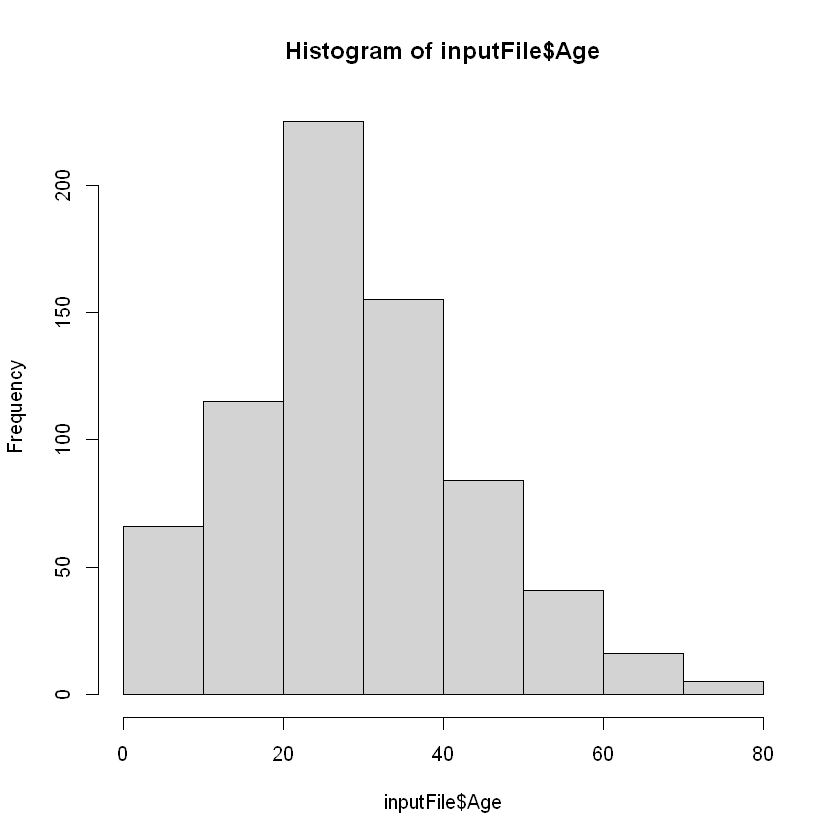

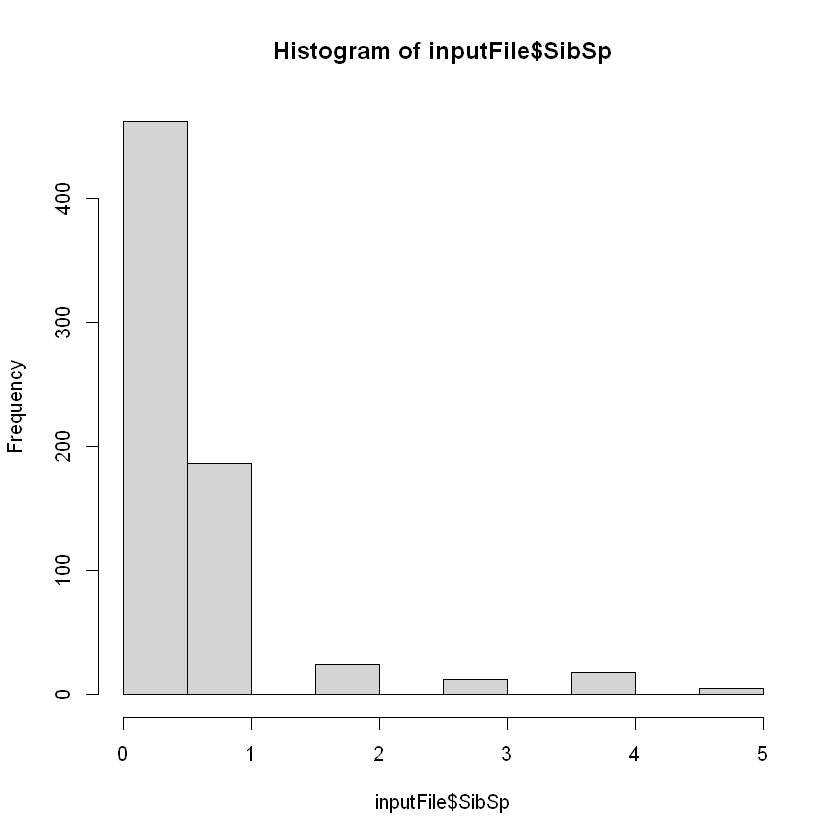

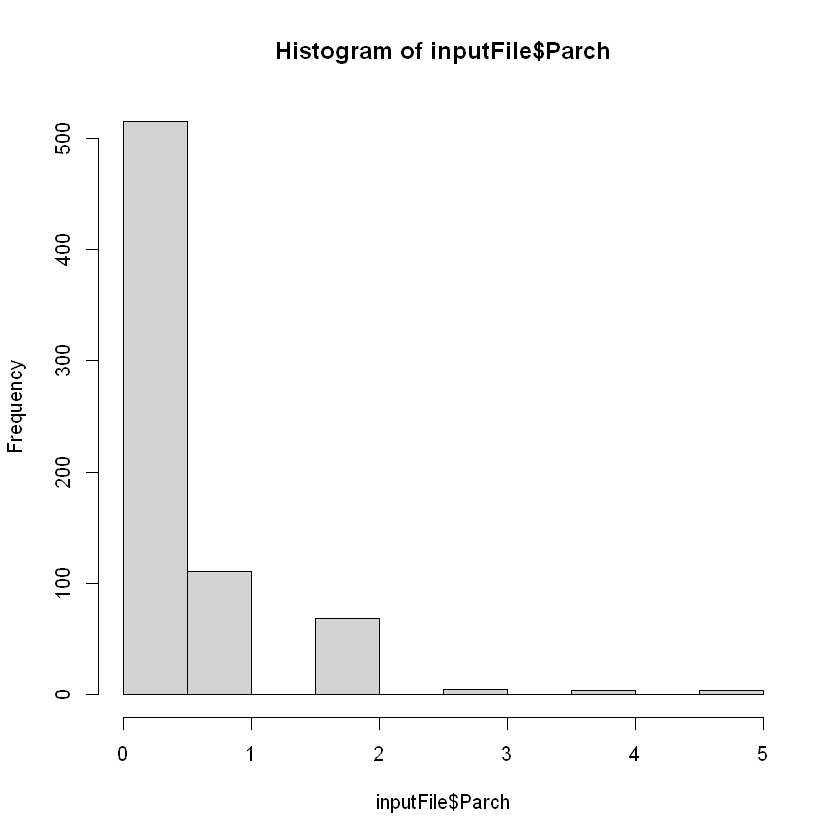

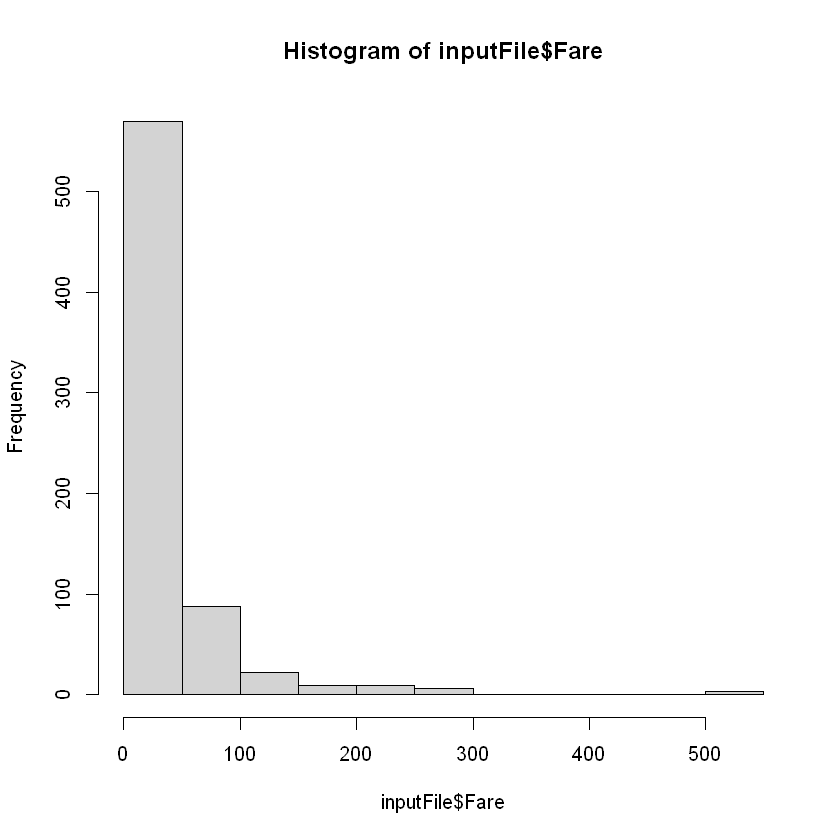

In [236]:
hist(inputFile$Age)
hist(inputFile$SibSp)
hist(inputFile$Parch)
hist(inputFile$Fare)

## Na bazie histogramu wnioskuję, że znaleziono wartości nieprawidłowe (odstające wartości powyżej ~300)

In [239]:
inputFile <- inputFile[!(inputFile$Fare >350),]

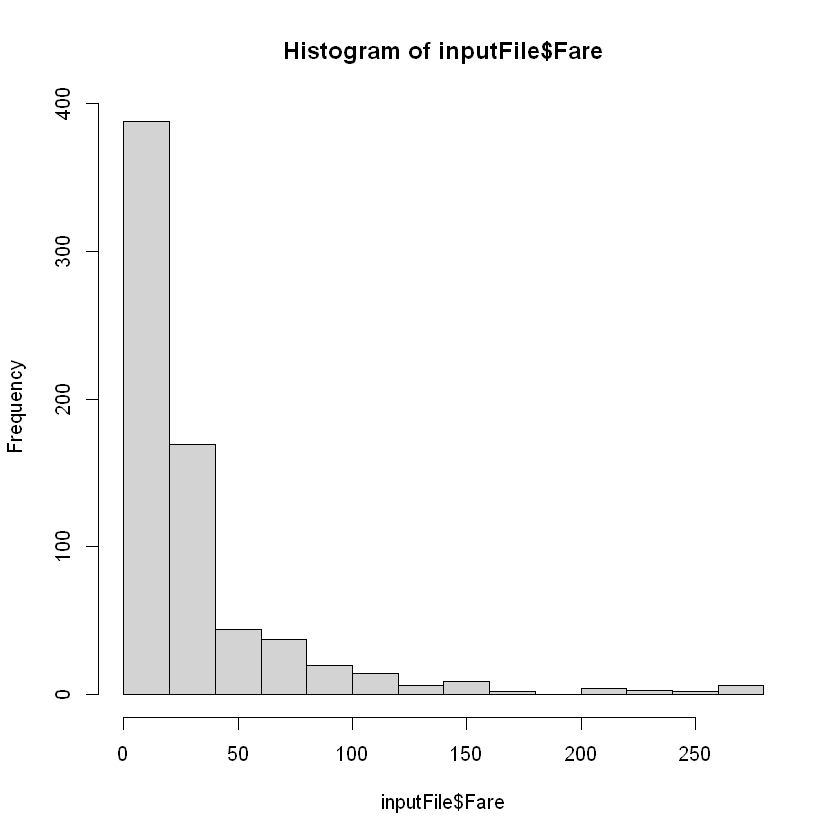

In [240]:
hist(inputFile$Fare)

## Zapisanie do pliku

In [242]:
write.table(inputFile, file='TitanicCleaned.tsv', quote=FALSE, sep='\t')